In [20]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

### load data

In [21]:
data=np.loadtxt("data.txt")
t=data[:,0]
sig=data[:,1]
noise=data[:,2]
round2=lambda x:np.round(x,2)

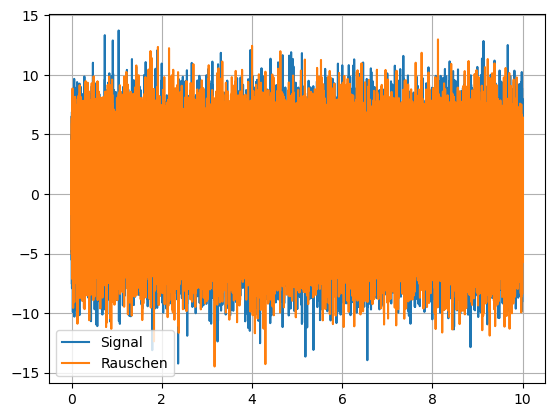

In [22]:
plt.plot(t,sig, label = "Signal")
plt.plot(t, noise, label = "Rauschen")
plt.grid()
plt.legend()

## Frage 1

sigma test = 3.0


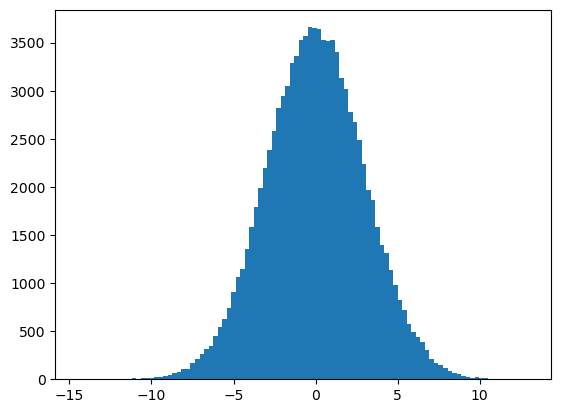

In [23]:
plt.hist(noise, bins = 100)
sigmaTest = np.std(noise)
print('sigma test =',round2(sigmaTest))

## Frage 2

Text(0.5, 1.0, 'PSD')

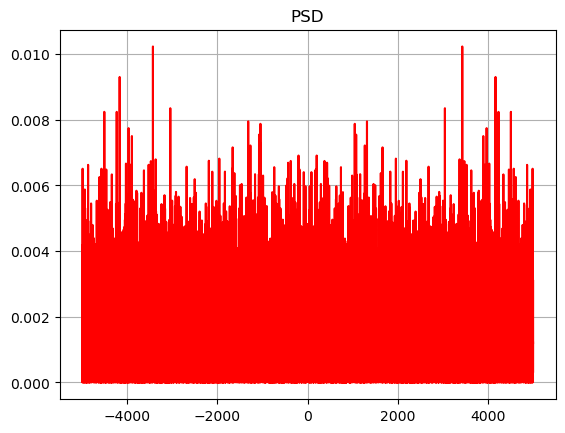

In [24]:
from numpy.fft import fft, fftfreq
N=len(t)
dt = t[1] - t[0]
#N2=100
fftx = fft(noise)/N
psd = dt*N*np.abs(fftx)**2
#psd2=dt*N*fftx.real**2
freqs=fftfreq(N,dt)
idx=np.argsort(freqs)
plt.plot(freqs[idx],psd[idx],'-r')
#plt.plot(freqs[idx],psd2[idx],'-g')
#plt.yscale('log')
plt.grid()
plt.title("PSD")


In [25]:
avgPSD=np.mean(psd)
print("mean psd =", avgPSD)


mean psd = 0.0008973381652446414


In [26]:
s_idx=np.argsort(-psd)
print(psd[s_idx[[1,3,5]]])
print(freqs[s_idx[[1,3,5]]])


[0.01023343 0.00930467 0.00835288]
[3430.1 4168.  3045. ]


[0.00473214 0.00422194 0.00416706]
[1093.75   1757.8125 1718.75  ]


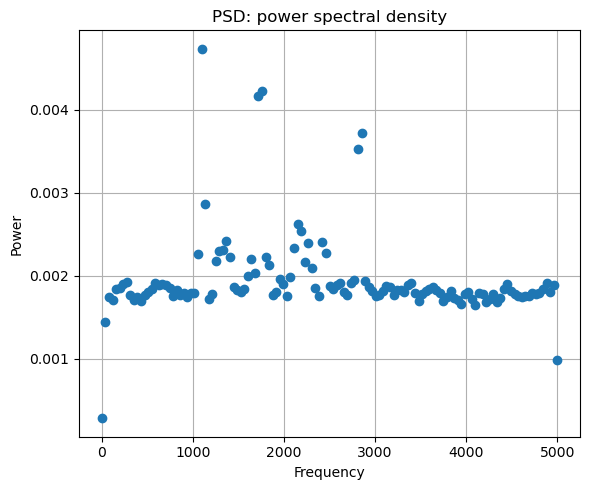

In [27]:
wfreqs, wpsd = scipy.signal.welch(sig,1/dt)

plt.figure(figsize=(6, 5))
#plt.semilogx(wfreqs, wpsd)
plt.plot(wfreqs, wpsd, 'o')
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.grid()

s_idx=np.argsort(-wpsd)
print(wpsd[s_idx[:3]])
print(wfreqs[s_idx[:3]])


## Frage 3

In [28]:
v_sig=np.var(sig)
v_noise=np.var(noise)
v_sig_alleine=v_sig-v_noise
print("v sig=", round2(v_sig))
print("v sig alleine=", round2(v_sig_alleine))
print(round2(np.var(sig-noise)))

v sig= 9.87
v sig alleine= 0.89
18.88
